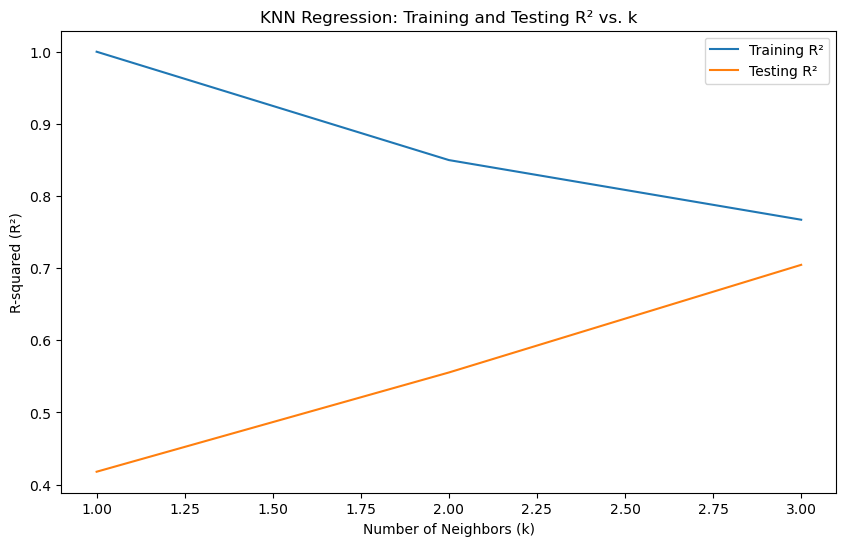

Training R²: [1.0, 0.8498256474063879, 0.7671599233075376]
Testing R²: [0.4179206827765607, 0.5554646251776688, 0.7046442656646525]


In [12]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score  # Use r2_score instead of mean_squared_error
import matplotlib.pyplot as plt

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features (X) and target (y)
X_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV']

X_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']

# Initialize lists to store R² values
train_r2 = []
test_r2 = []
k_values = range(1,4)
# Train KNN models with different k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate R² for training and testing data
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Plot the R² values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_r2, label='Training R²')
plt.plot(k_values, test_r2, label='Testing R²')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R-squared (R²)')
plt.title('KNN Regression: Training and Testing R² vs. k')
plt.legend()
plt.show()

# Print R² values
print("Training R²:", train_r2)
print("Testing R²:", test_r2)